<a href="https://colab.research.google.com/github/muajnstu/Comparative-Analysis-of-KNN-Variants-for-Diabetes-Prediction-Using-Administrative-Health-data/blob/main/Freidman_Test_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-posthocs

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
from scipy.stats import rankdata
import scikit_posthocs as sp
import altair as alt
from scipy.stats import friedmanchisquare, rankdata
import scikit_posthocs as sp
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt


In [11]:
df=pd.read_csv('https://raw.githubusercontent.com/muajnstu/Comparative-Analysis-of-KNN-Variants-for-Diabetes-Prediction-Using-Administrative-Health-data/refs/heads/main/Latest%20fold%20wise%20result.csv')
display(df.head())

,Classifiers,DistanceKNN,Unnamed: 2,Unnamed: 3,EuclideanKNN,Unnamed: 5,Unnamed: 6,GeneralizedKNN,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,WminkowskiKNN,Unnamed: 20,Unnamed: 21,ManhattanKNN,Unnamed: 23,Unnamed: 24,ChebyshevKNN,Unnamed: 26,Unnamed: 27
0,Fold,Accuracy,AUC,F-Measure,Accuracy,AUC,F-Measure,Accuracy,AUC,F-Measure,...,F-Measure,Accuracy,AUC,F-Measure,Accuracy,AUC,F-Measure,Accuracy,AUC,F-Measure
1,Fold 1,0.9114,0.9596,0.9099,0.9059,0.9576,0.9041,0.9122,0.957,0.9106,...,0.959,0.9122,0.957,0.9106,0.8813,0.9445,0.878,0.856,0.9409,0.8567
2,Fold 2,0.928,0.9662,0.9271,0.9241,0.9648,0.9232,0.9233,0.9648,0.9226,...,0.9589,0.9233,0.9648,0.9226,0.9019,0.9541,0.8993,0.8845,0.9547,0.8853
3,Fold 3,0.913,0.9619,0.9115,0.9066,0.9598,0.9055,0.9177,0.9631,0.9168,...,0.9373,0.9177,0.9631,0.9168,0.8884,0.9506,0.8849,0.8663,0.9493,0.8674
4,Fold 4,0.9438,0.9727,0.9433,0.9383,0.9713,0.9378,0.9407,0.973,0.9405,...,0.9606,0.9407,0.973,0.9405,0.9011,0.9606,0.8984,0.8948,0.9597,0.8957


In [3]:
df2=pd.read_csv('https://raw.githubusercontent.com/muajnstu/Comparative-Analysis-of-KNN-Variants-for-Diabetes-Prediction-Using-Administrative-Health-data/refs/heads/main/fold-wise%20result%20on%20baseline.csv')
df2.head()

,Classifiers,DistanceKNN,Unnamed: 2,Unnamed: 3,EuclideanKNN,Unnamed: 5,Unnamed: 6,GeneralizedKNN,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,WminkowskiKNN,Unnamed: 20,Unnamed: 21,ManhattanKNN,Unnamed: 23,Unnamed: 24,ChebyshevKNN,Unnamed: 26,Unnamed: 27
0,Fold,Accuracy,AUC,F-Measure,Accuracy,AUC,F-Measure,Accuracy,AUC,F-Measure,...,F-Measure,Accuracy,AUC,F-Measure,Accuracy,AUC,F-Measure,Accuracy,AUC,F-Measure
1,Fold 1,0.7885,0.5476,0.1616,0.792,0.5425,0.1591,0.8067,0.5642,0.184,...,0.1682,0.8067,0.5642,0.184,0.7934,0.5636,0.2054,0.8067,0.5687,0.1888
2,Fold 2,0.785,0.5936,0.2113,0.7864,0.5981,0.1958,0.7941,0.5835,0.2228,...,0.2073,0.7941,0.5835,0.2228,0.792,0.6066,0.241,0.7456,0.5609,0.2165
3,Fold 3,0.7827,0.5877,0.2294,0.7848,0.5795,0.2194,0.7982,0.5597,0.1633,...,0.2116,0.7982,0.5597,0.1633,0.8136,0.5612,0.2229,0.7954,0.5558,0.2071
4,Fold 4,0.7954,0.566,0.1983,0.7996,0.5735,0.1834,0.7982,0.5643,0.2137,...,0.1973,0.7982,0.5643,0.2137,0.7918,0.555,0.1732,0.7736,0.5756,0.203


# Baseline

In [5]:
# Select only accuracy columns
accuracy_columns = [
    'ChebyshevKNN', 'DistanceKNN', 'EuclideanKNN',
    'GeneralizedKNN', 'KNN',
    'MahalanobisKNN', 'SeuclideanKNN',	'ManhattanKNN', 'WminkowskiKNN'
]

# Prepare accuracy values, excluding the first row
accuracy_data = [df2[col].iloc[1:].astype(float).values for col in accuracy_columns]

# Friedman test
statistic, p_value = friedmanchisquare(*accuracy_data)
print(" Friedman Chi-square statistic:", statistic)
print(" p-value:", p_value)

# Rank classifiers per fold
accuracy_matrix = np.array(accuracy_data).T
ranks = np.array([rankdata(-row) for row in accuracy_matrix])
avg_ranks = ranks.mean(axis=0)

# Show average ranks
rank_df = pd.DataFrame({
    'Classifier': accuracy_columns,
    'Average Rank': avg_ranks
}).sort_values("Average Rank")

display(rank_df)

 Friedman Chi-square statistic: 22.6837169650469
 p-value: 0.003794959322738224


,Classifier,Average Rank
3,GeneralizedKNN,3.45
8,WminkowskiKNN,3.45
7,ManhattanKNN,4.20
4,KNN,4.40
2,EuclideanKNN,4.40
5,MahalanobisKNN,4.60
1,DistanceKNN,6.45
6,SeuclideanKNN,7.00
0,ChebyshevKNN,7.05


In [9]:
# Step 1: Friedman test
statistic, p_value = friedmanchisquare(*accuracy_data)

# Step 2: Average ranks
accuracy_matrix = np.array(accuracy_data).T
ranks = np.array([rankdata(-row) for row in accuracy_matrix])
avg_ranks = ranks.mean(axis=0)

# Step 3: Identify best model
best_idx = np.argmin(avg_ranks)
best_model = accuracy_columns[best_idx]

# Step 4: Nemenyi post hoc p-values
p_values_matrix = sp.posthoc_nemenyi_friedman(accuracy_matrix)
p_values = p_values_matrix.iloc[best_idx].values

# Step 5: Compute z-values
k = len(accuracy_columns)
N = accuracy_matrix.shape[0]
q = np.sqrt(k*(k+1)/(6*N))
z_values = np.abs(avg_ranks - avg_ranks[best_idx]) / q

# Step 6: Adjust p-values (Bonferroni, Holm, Hochberg)
p_bonf = multipletests(p_values, method='bonferroni')[1]
p_holm = multipletests(p_values, method='holm')[1]
p_hoch = multipletests(p_values, method='h')[1]

# Step 7: Holland correction
sorted_idx = np.argsort(p_values)
p_sorted = p_values[sorted_idx]
p_holland_sorted = [1 - (1 - p_sorted[i])**(k - i) for i in range(k)]
# Reorder back to original order
p_holland = np.empty_like(p_holland_sorted)
p_holland[sorted_idx] = p_holland_sorted

# Step 8: Combine results
result_df = pd.DataFrame({
    'Model': accuracy_columns,
    'Ranking': avg_ranks,
    'z': z_values,
    'p': p_values,
    'p_Bonf': p_bonf,
    'p_Holm': p_holm,
    'p_Hochberg': p_hoch,
    'p_Holland': p_holland
}).sort_values("Ranking").reset_index(drop=True)

print("Best Model:", best_model)
display(result_df)


Best Model: GeneralizedKNN


,Model,Ranking,z,p,p_Bonf,p_Holm,p_Hochberg,p_Holland
0,GeneralizedKNN,3.45,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,WminkowskiKNN,3.45,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,ManhattanKNN,4.20,0.612372,0.999550,1.000000,1.000000,1.000000,1.000000
3,KNN,4.40,0.775672,0.997504,1.000000,1.000000,1.000000,1.000000
4,EuclideanKNN,4.40,0.775672,0.997504,1.000000,1.000000,1.000000,1.000000
5,MahalanobisKNN,4.60,0.938971,0.990740,1.000000,1.000000,1.000000,1.000000
6,DistanceKNN,6.45,2.449490,0.257175,1.000000,1.000000,1.000000,0.875203
7,SeuclideanKNN,7.00,2.898563,0.088955,0.800598,0.716376,0.716376,0.525411
8,ChebyshevKNN,7.05,2.939388,0.079597,0.716376,0.716376,0.716376,0.525976


In [10]:
from google.colab import files

result_df.to_csv('statistical_results.csv', index=False)
files.download('statistical_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# DSK- Chain

In [13]:
# Select only accuracy columns
accuracy_columns = [
    'ChebyshevKNN', 'DistanceKNN', 'EuclideanKNN',
    'GeneralizedKNN', 'KNN',
    'MahalanobisKNN', 'SeuclideanKNN',	'ManhattanKNN', 'WminkowskiKNN'
]

# Prepare accuracy values, excluding the first row
accuracy_data = [df[col].iloc[1:].astype(float).values for col in accuracy_columns]

# Show average ranks
rank_df = pd.DataFrame({
    'Classifier': accuracy_columns,
    'Average Rank': avg_ranks
}).sort_values("Average Rank")

display(rank_df)

,Classifier,Average Rank
3,GeneralizedKNN,3.45
8,WminkowskiKNN,3.45
7,ManhattanKNN,4.20
4,KNN,4.40
2,EuclideanKNN,4.40
5,MahalanobisKNN,4.60
1,DistanceKNN,6.45
6,SeuclideanKNN,7.00
0,ChebyshevKNN,7.05


In [ ]:
# Step 1: Friedman test
statistic, p_value = friedmanchisquare(*accuracy_data)

# Step 2: Average ranks
accuracy_matrix = np.array(accuracy_data).T
ranks = np.array([rankdata(-row) for row in accuracy_matrix])
avg_ranks = ranks.mean(axis=0)

# Step 3: Identify best model
best_idx = np.argmin(avg_ranks)
best_model = accuracy_columns[best_idx]

# Step 4: Nemenyi post hoc p-values
p_values_matrix = sp.posthoc_nemenyi_friedman(accuracy_matrix)
p_values = p_values_matrix.iloc[best_idx].values

# Step 5: Compute z-values
k = len(accuracy_columns)
N = accuracy_matrix.shape[0]
q = np.sqrt(k*(k+1)/(6*N))
z_values = np.abs(avg_ranks - avg_ranks[best_idx]) / q

# Step 6: Adjust p-values (Bonferroni, Holm, Hochberg)
p_bonf = multipletests(p_values, method='bonferroni')[1]
p_holm = multipletests(p_values, method='holm')[1]
p_hoch = multipletests(p_values, method='h')[1]

# Step 7: Holland correction
sorted_idx = np.argsort(p_values)
p_sorted = p_values[sorted_idx]
p_holland_sorted = [1 - (1 - p_sorted[i])**(k - i) for i in range(k)]
# Reorder back to original order
p_holland = np.empty_like(p_holland_sorted)
p_holland[sorted_idx] = p_holland_sorted

# Step 8: Combine results
result_df = pd.DataFrame({
    'Model': accuracy_columns,
    'Ranking': avg_ranks,
    'z': z_values,
    'p': p_values,
    'p_Bonf': p_bonf,
    'p_Holm': p_holm,
    'p_Hochberg': p_hoch,
    'p_Holland': p_holland
}).sort_values("Ranking").reset_index(drop=True)

print("Best Model:", best_model)
display(result_df)


Best Model: MahalanobisKNN


,Model,Ranking,z,p,p_Bonf,p_Holm,p_Hochberg,p_Holland
0,MahalanobisKNN,1.2,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,SeuclideanKNN,1.8,0.489898,9.999158e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
2,DistanceKNN,4.0,2.286190,3.503996e-01,1.000000e+00,1.000000e+00,1.000000e+00,7.258812e-01
3,GeneralizedKNN,4.4,2.612789,1.810416e-01,1.000000e+00,9.052080e-01,9.052080e-01,6.316088e-01
4,WminkowskiKNN,4.4,2.612789,1.810416e-01,1.000000e+00,9.052080e-01,9.052080e-01,5.501711e-01
5,KNN,6.1,4.000833,2.062649e-03,1.856384e-02,1.443855e-02,1.443855e-02,1.434951e-02
6,EuclideanKNN,6.1,4.000833,2.062649e-03,1.856384e-02,1.443855e-02,1.443855e-02,1.231225e-02
7,ManhattanKNN,8.0,5.552177,1.008846e-06,9.079618e-06,8.070771e-06,8.070771e-06,8.070743e-06
8,ChebyshevKNN,9.0,6.368673,6.855836e-09,6.170252e-08,6.170252e-08,6.170252e-08,6.170252e-08


In [ ]:
from google.colab import files

result_df.to_csv('statistical_results.csv', index=False)
files.download('statistical_results.csv')

In [ ]:
import altair as alt

chart = alt.Chart(rank_df).mark_line().encode(
    x='Classifier',
    y='Average Rank'
).properties(
    width=800,
    height=500
)

# Display the chart
chart

alt.Chart(...)

,0,1,2,3,4,5,6,7,8
0,1.000000e+00,0.000512,0.457432,0.003372,0.457432,2.539808e-08,4.239411e-08,0.996425,0.003372
1,5.120259e-04,1.000000,0.402520,0.999957,0.402520,6.572382e-01,7.116757e-01,0.013259,0.999957
2,4.574319e-01,0.402520,1.000000,0.711676,1.000000,1.744253e-03,2.434556e-03,0.929810,0.711676
3,3.372274e-03,0.999957,0.711676,1.000000,0.711676,3.503996e-01,4.025203e-01,0.056236,1.000000
4,4.574319e-01,0.402520,1.000000,0.711676,1.000000,1.744253e-03,2.434556e-03,0.929810,0.711676
5,2.539808e-08,0.657238,0.001744,0.350400,0.001744,1.000000e+00,1.000000e+00,0.000003,0.350400
6,4.239411e-08,0.711676,0.002435,0.402520,0.002435,1.000000e+00,1.000000e+00,0.000005,0.402520
7,9.964245e-01,0.013259,0.929810,0.056236,0.929810,3.168668e-06,4.950162e-06,1.000000,0.056236
8,3.372274e-03,0.999957,0.711676,1.000000,0.711676,3.503996e-01,4.025203e-01,0.056236,1.000000


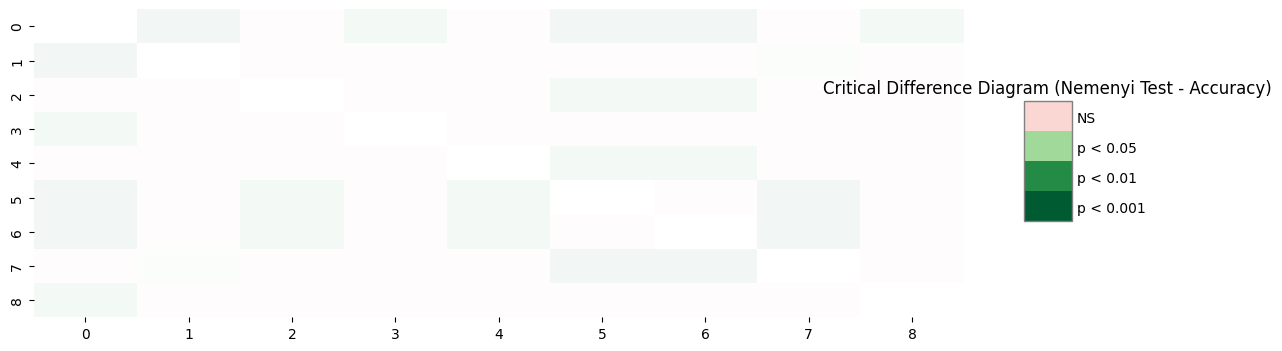

In [ ]:
#  Run the Nemenyi post hoc test on the ranks
nemenyi_result = sp.posthoc_nemenyi_friedman(ranks)
display(nemenyi_result)

# Plot the Critical Difference Diagram
plt.figure(figsize=(12, 4))
sp.sign_plot(nemenyi_result, accuracy_columns, alpha=0.05)
plt.title("Critical Difference Diagram (Nemenyi Test - Accuracy)")
plt.show()